<a href="https://colab.research.google.com/github/manikesh12/team5-miniproject1/blob/branch1/store_item_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


You are given 5 years of store-item sales data, for 50 different items at 10 different stores.

In [11]:
# pip install -q kaggle

In [12]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"likhitha19daram","key":"f99b4798d1eb26c763508fa763155a48"}'}

In [13]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [15]:
print(os.listdir())

['.config', 'kaggle.json', 'sample_data']


In [16]:
!cp kaggle.json ~/.kaggle/

In [17]:
!chmod 600 ~/.kaggle/kaggle.json

In [18]:
# !kaggle datasets list
!kaggle competitions download -c demand-forecasting-kernels-only

  0% 0.00/3.29M [00:00<?, ?B/s]
100% 3.29M/3.29M [00:00<00:00, 173MB/s]


In [19]:
!unzip demand-forecasting-kernels-only.zip

Archive:  demand-forecasting-kernels-only.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [20]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')
df_ss = pd.read_csv('/content/sample_submission.csv')

In [21]:
df_train.head(10)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
5,2013-01-06,1,1,12
6,2013-01-07,1,1,10
7,2013-01-08,1,1,9
8,2013-01-09,1,1,12
9,2013-01-10,1,1,9


In [22]:
df_test.head(10)

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1
5,5,2018-01-06,1,1
6,6,2018-01-07,1,1
7,7,2018-01-08,1,1
8,8,2018-01-09,1,1
9,9,2018-01-10,1,1


In [23]:
df_ss.head(10)

,id,sales
0,0,52
1,1,52
2,2,52
3,3,52
4,4,52
5,5,52
6,6,52
7,7,52
8,8,52
9,9,52


In [24]:
print(df_train.info())
print(df_test.info())
print(df_ss.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      45000 non-null  int64 
 1   date    45000 non-null  object
 2   store   45000 non-null  int64 
 3   item    45000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      45000 non-null  int64
 1   sales   45000 n

In [25]:
print(df_train.isna().sum())
print(df_test.isna().sum())
print(df_ss.isna().sum())

date     0
store    0
item     0
sales    0
dtype: int64
id       0
date     0
store    0
item     0
dtype: int64
id       0
sales    0
dtype: int64


In [26]:
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())
print(df_ss.duplicated().sum())

0
0
0


In [27]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_test['date'] = pd.to_datetime(df_test['date'])

In [28]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   id      45000 non-null  int64         
 1   date    45000 non-null  datetime64[ns]
 2   store   45000 non-null  int64         
 3   item    45000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.4 MB
None


In [29]:
print(df_train.describe())

               store           item          sales
count  913000.000000  913000.000000  913000.000000
mean        5.500000      25.500000      52.250287
std         2.872283      14.430878      28.801144
min         1.000000       1.000000       0.000000
25%         3.000000      13.000000      30.000000
50%         5.500000      25.500000      47.000000
75%         8.000000      38.000000      70.000000
max        10.000000      50.000000     231.000000


In [30]:
print(df_test.describe())

                 id         store         item
count  45000.000000  45000.000000  45000.00000
mean   22499.500000      5.500000     25.50000
std    12990.525394      2.872313     14.43103
min        0.000000      1.000000      1.00000
25%    11249.750000      3.000000     13.00000
50%    22499.500000      5.500000     25.50000
75%    33749.250000      8.000000     38.00000
max    44999.000000     10.000000     50.00000


In [31]:
print(df_ss.describe())

                 id    sales
count  45000.000000  45000.0
mean   22499.500000     52.0
std    12990.525394      0.0
min        0.000000     52.0
25%    11249.750000     52.0
50%    22499.500000     52.0
75%    33749.250000     52.0
max    44999.000000     52.0


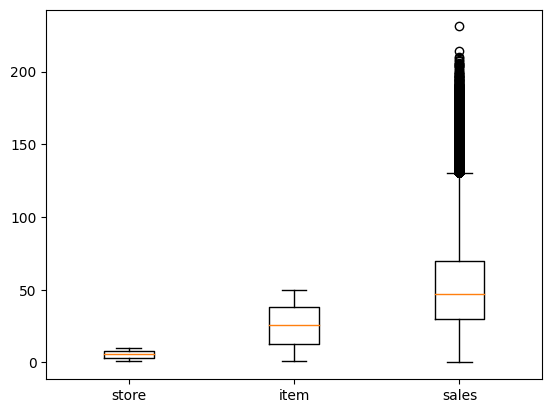

In [32]:
df = df_train.drop('date' , axis=1)
plt.boxplot(df)
plt.xticks(ticks = [1,2,3], labels= list(df.columns))
plt.show()

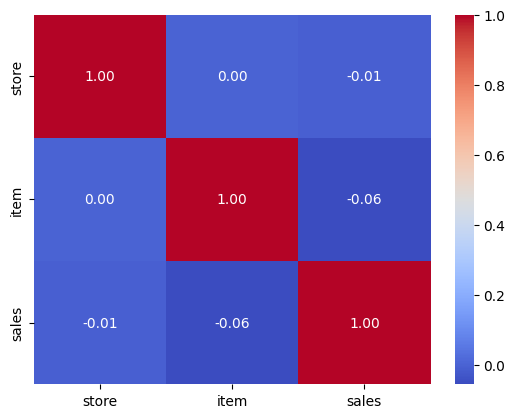

In [33]:
corr_matrix = df_train.drop('date',axis=1).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

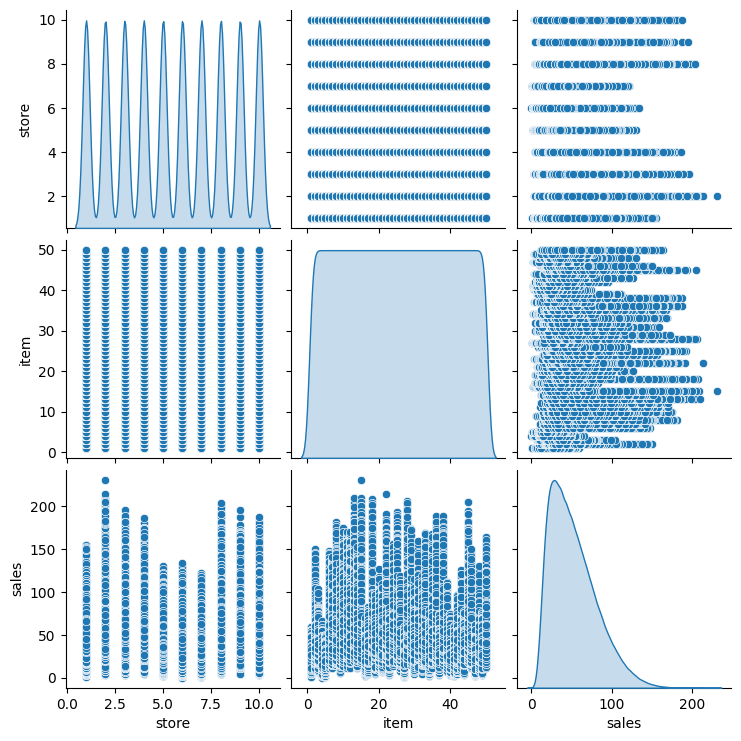

In [34]:
sns.pairplot(df_train, diag_kind='kde')
plt.show()

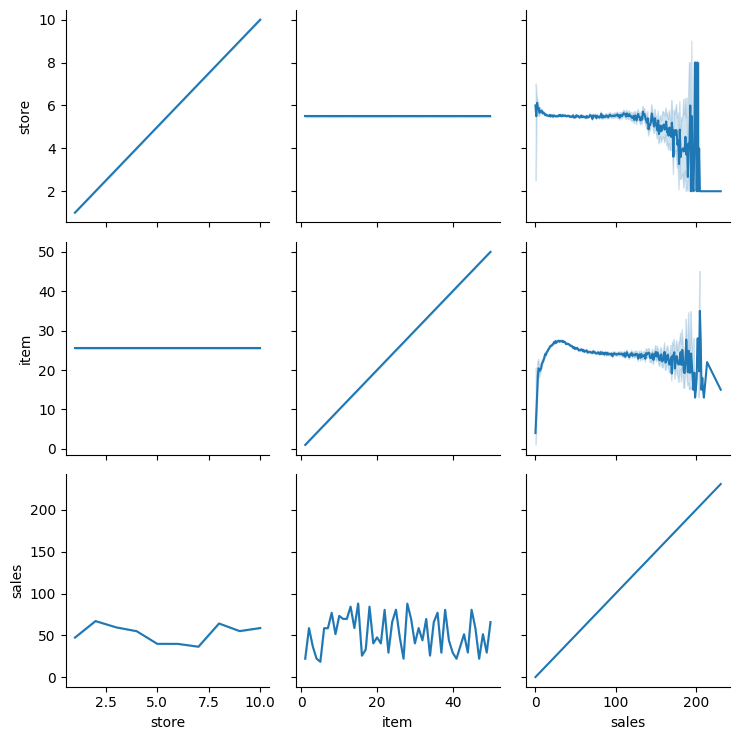

In [35]:
g = sns.PairGrid(df_train)
g.map(sns.lineplot)
plt.tight_layout()
plt.show()

In [36]:
print("Starting date",df_train['date'].min())
print("Ending date",df_train['date'].max())

Starting date 2013-01-01 00:00:00
Ending date 2017-12-31 00:00:00


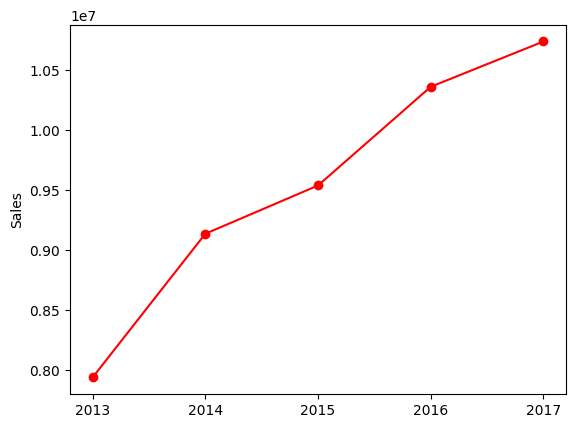

date
2013     7941243
2014     9135482
2015     9536887
2016    10357160
2017    10733740
Name: sales, dtype: int64

In [37]:
# yearly sales
year_sales = df_train.groupby(df_train['date'].dt.year)['sales'].sum()

plt.plot(df_train['date'].dt.year.unique(), year_sales, marker='o', color='r')
plt.xticks(df_train['date'].dt.year.unique())
plt.ylabel("Sales")
plt.show()
year_sales

In [38]:
print(df_train.store.nunique())
print(df_train.item.nunique())

10
50


In [39]:
print(df_train.groupby(["store"])["item"].nunique())

store
1     50
2     50
3     50
4     50
5     50
6     50
7     50
8     50
9     50
10    50
Name: item, dtype: int64


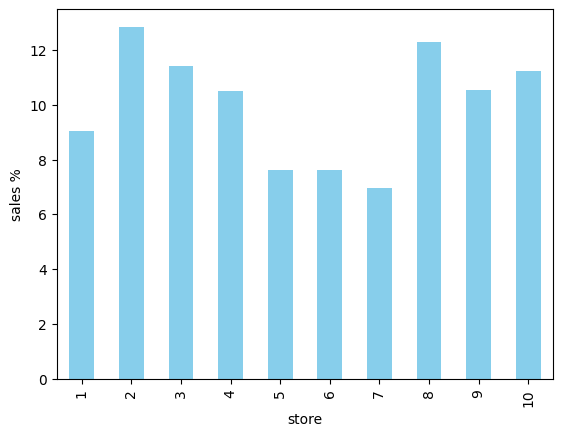

In [40]:
store_sales = df_train.groupby('store')['sales'].sum()
sales_percentages = (store_sales / store_sales.sum()) * 100

sales_percentages.plot(kind='bar', color='skyblue')
plt.ylabel('sales %')
plt.show()

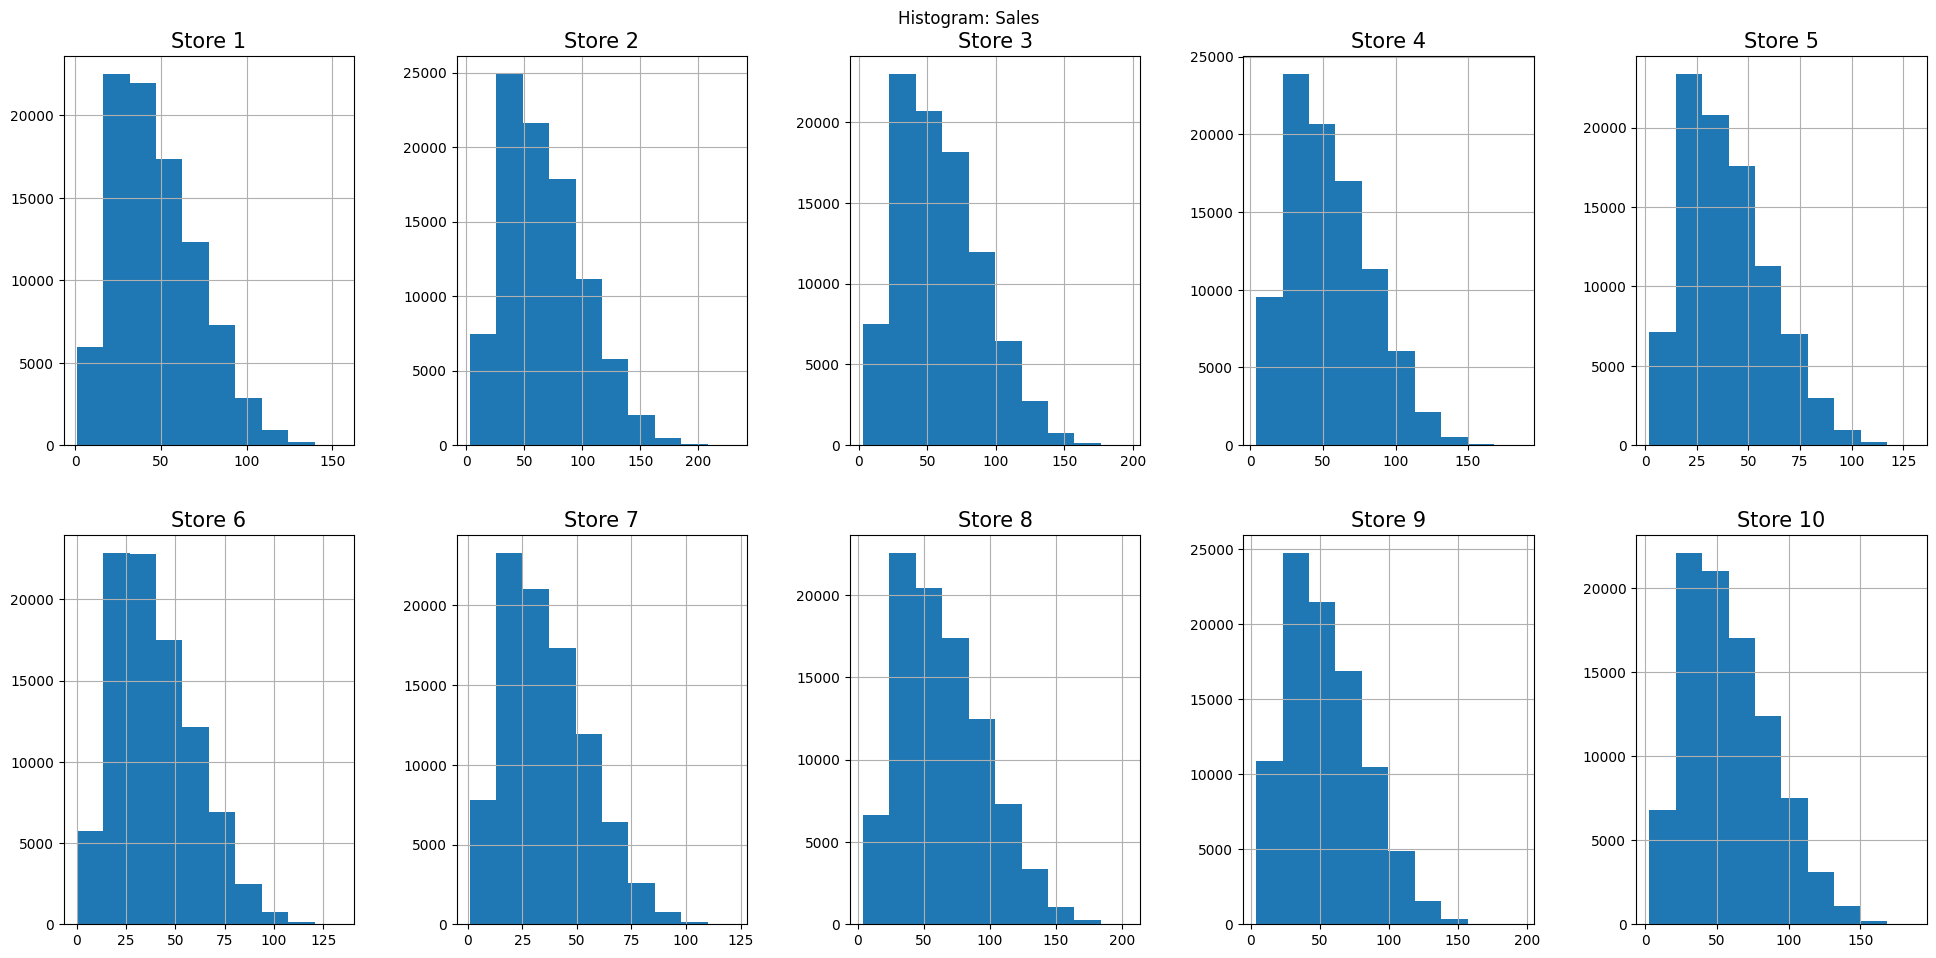

In [41]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
for i in range(1,11):
    if i < 6:
        df_train[df_train.store == i].sales.hist(ax=axes[0, i-1])
        axes[0,i-1].set_title("Store " + str(i), fontsize = 15)

    else:
        df_train[df_train.store == i].sales.hist(ax=axes[1, i - 6])
        axes[1,i-6].set_title("Store " + str(i), fontsize = 15)
plt.tight_layout(pad=3)
plt.suptitle("Histogram: Sales");

In [42]:
print(df_train.groupby(["store"])["sales"].nunique())

store
1     150
2     207
3     183
4     169
5     126
6     130
7     119
8     195
9     170
10    179
Name: sales, dtype: int64


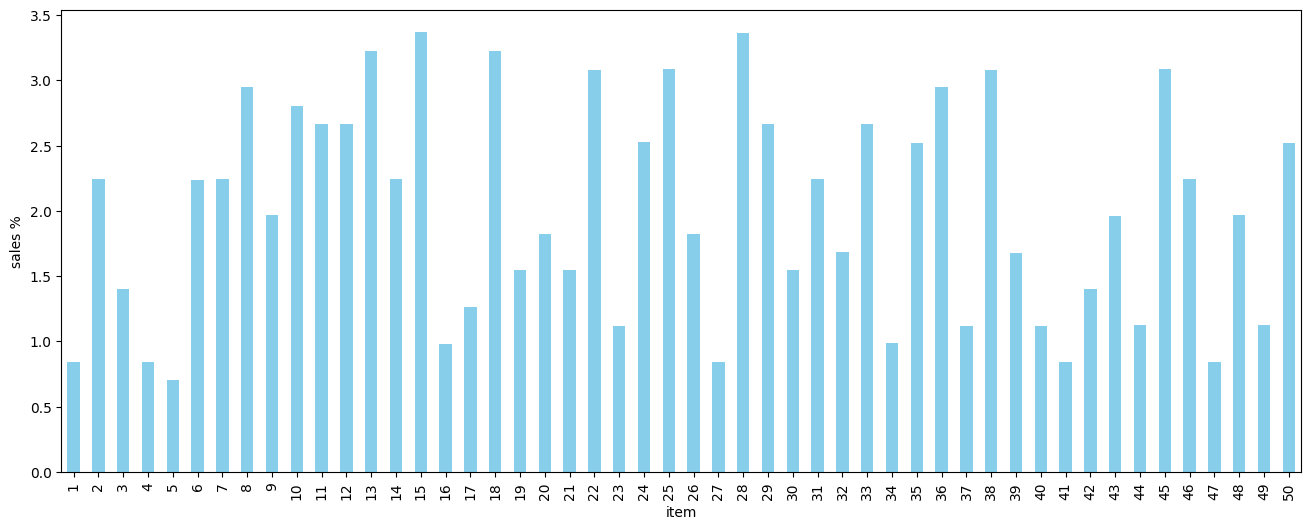

In [43]:
item_sales = df_train.groupby('item')['sales'].sum()
sales_percentages = (item_sales / item_sales.sum()) * 100

sales_percentages.plot(kind='bar', color='skyblue', figsize=(16,6))
plt.ylabel('sales %')
plt.show()

In [44]:
df_train.groupby(["item"]).agg({"sales": ["count","sum", "mean", "median", "std", "min", "max","nunique"]})


sales                                                       
      count      sum       mean median        std min  max nunique
item                                                              
1     18260   401384  21.981599   21.0   8.468922   1   59      59
2     18260  1069564  58.574151   56.0  20.093015   9  150     134
3     18260   669087  36.642223   35.0  13.179441   7  104      86
4     18260   401907  22.010241   21.0   8.403898   0   66      61
5     18260   335230  18.358708   18.0   7.265167   1   50      50
6     18260  1068281  58.503888   56.0  20.174898  11  148     129
7     18260  1068777  58.531051   56.0  20.146002  11  141     126
8     18260  1405108  76.950055   74.0  26.130697  15  181     162
9     18260   938379  51.389869   49.5  17.790158   6  134     122
10    18260  1337133  73.227437   70.0  24.823725  14  175     153
11    18260  1271925  69.656353   67.0  23.744732  11  170     153
12    18260  1271534  69.634940   67.0  23.738663  12  170     148
13    18260  1539621  84.316594   81.0  28.311031  20  210     172
14    18260  1071531  58.681873   56.0  20.079860  12  152     130
15    18260  1607442  88.030778   85.0  29.522852  17  231     183
16    18260   468480  25.656079   25.0   9.603270   2   70      66
17    18260   602486  32.994852   32.0  11.967610   4   83      79
18    18260  1538876  84.275794   81.0  28.430621  18  208     176
19    18260   736892  40.355531   39.0  14.332645   5   99      93
20    18260   867641  47.515936   46.0  16.490487   9  127     106
21    18260   736190  40.317087   39.0  14.338006   7  109      95
22    18260  1469971  80.502245   78.0  27.118163  14  214     166
23    18260   534979  29.297864   28.0  10.819549   3   81      76
24    18260  1205975  66.044633   64.0  22.531555  14  156     139
25    18260  1473334  80.686418   78.0  27.238817  18  193     166
26    18260   869981  47.644085   46.0  16.723912   8  119     107
27    18260   402628  22.049726   21.0   8.461641   1   59      58
28    18260  1604713  87.881325   85.0  29.501781  16  206     181
29    18260  1271240  69.618839   67.0  23.635631  15  173     147
30    18260   736554  40.337021   39.0  14.363331   5  115      98
31    18260  1070845  58.644304   57.0  20.104705  10  159     136
32    18260   803107  43.981763   42.0  15.574556   5  119     104
33    18260  1270183  69.560953   67.0  23.718343  15  169     149
34    18260   469935  25.735761   25.0   9.617910   2   79      65
35    18260  1201541  65.801807   63.0  22.461990  12  168     140
36    18260  1406548  77.028916   74.0  26.067440  16  188     159
37    18260   534258  29.258379   28.0  10.771547   3   74      72
38    18260  1470330  80.521906   77.0  27.141799  15  188     166
39    18260   801311  43.883406   42.0  15.511550   7  112     102
40    18260   534094  29.249398   28.0  10.822959   3   74      71
41    18260   401759  22.002136   21.0   8.402470   2   60      57
42    18260   669925  36.688116   35.0  13.215112   5   96      89
43    18260   936635  51.294359   49.0  17.801008   9  126     113
44    18260   536811  29.398193   28.0  10.797738   3   78      73
45    18260  1471467  80.584173   78.0  27.318402  18  205     166
46    18260  1070764  58.639869   56.0  20.220879  11  150     129
47    18260   401781  22.003341   21.0   8.420102   2   61      57
48    18260   937703  51.352848   49.0  17.881917   8  130     117
49    18260   535663  29.335323   28.0  10.874788   3   77      73
50    18260  1203009  65.882202   63.0  22.416031  12  164     144

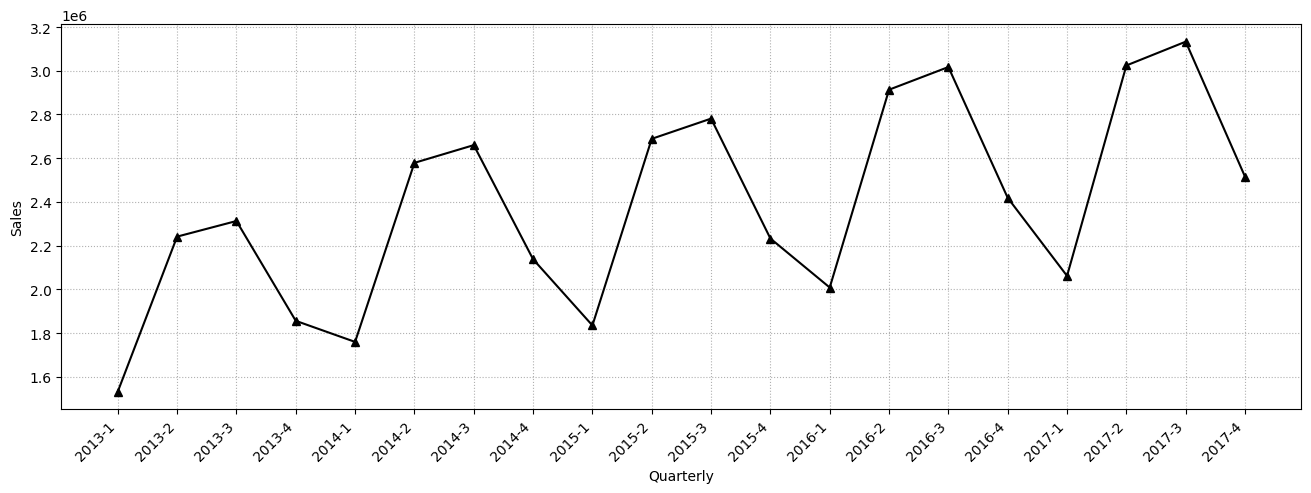

In [98]:
# quarter sales
plt.figure(figsize=(16,5))

df_ts = df_train.groupby([df_train['date'].dt.year,df_train['date'].dt.quarter])['sales'].sum()
df_ts.plot(marker='^',c= 'k')
plt.xlabel('Quarterly')
plt.ylabel('Sales')

xticks_labels = [f"{yr}-{qr}" for yr,qr in zip(df_ts.index.get_level_values(0), df_ts.index.get_level_values(1))]
plt.xticks(range(len(df_ts)), xticks_labels, rotation=45, ha='right')

plt.grid(linestyle=':')
plt.show()

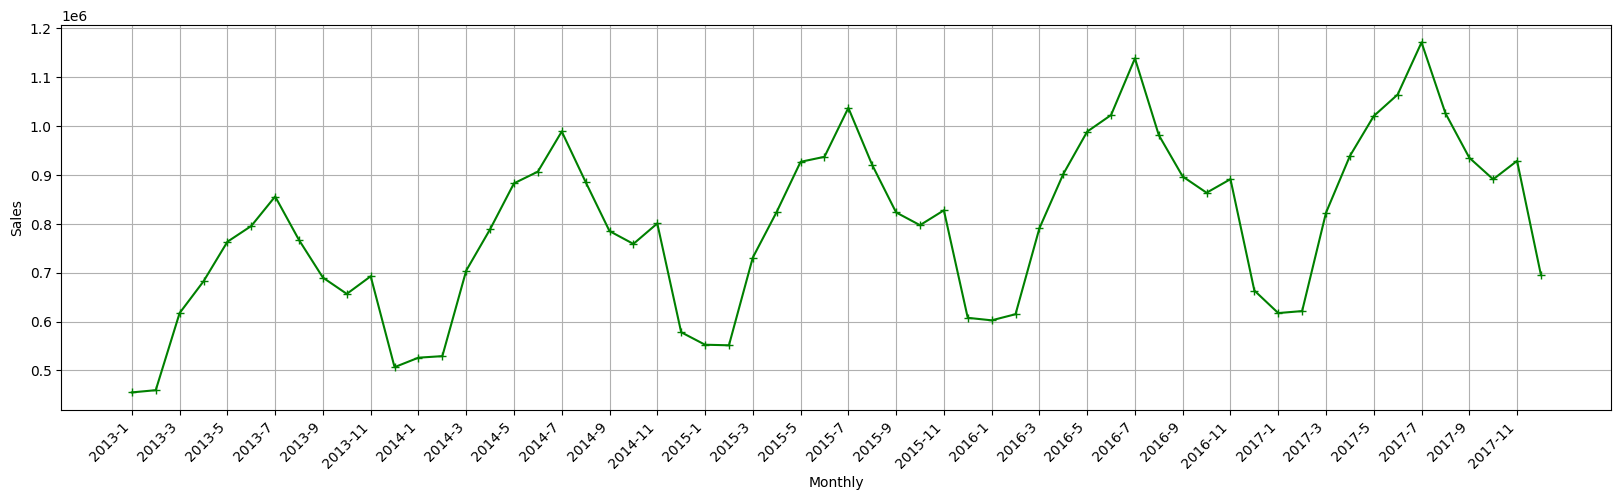

In [104]:
# monthly sales
plt.figure(figsize=(20,5))

df_ms = df_train.groupby([df_train['date'].dt.year,df_train['date'].dt.month])['sales'].sum()
df_ms.plot(marker='+',c= 'g')
plt.xlabel('Monthly')
plt.ylabel('Sales')

xticks_labels = [f"{yr}-{mt}" for yr,mt in zip(df_ms.index.get_level_values(0), df_ms.index.get_level_values(1))]
xticks_labels1 = []
for i in range(0,len(df_ms),2):
  xticks_labels1.append(xticks_labels[i])

plt.xticks(range(0,len(df_ms),2), xticks_labels1, rotation=45, ha='right')

plt.grid()
plt.show()

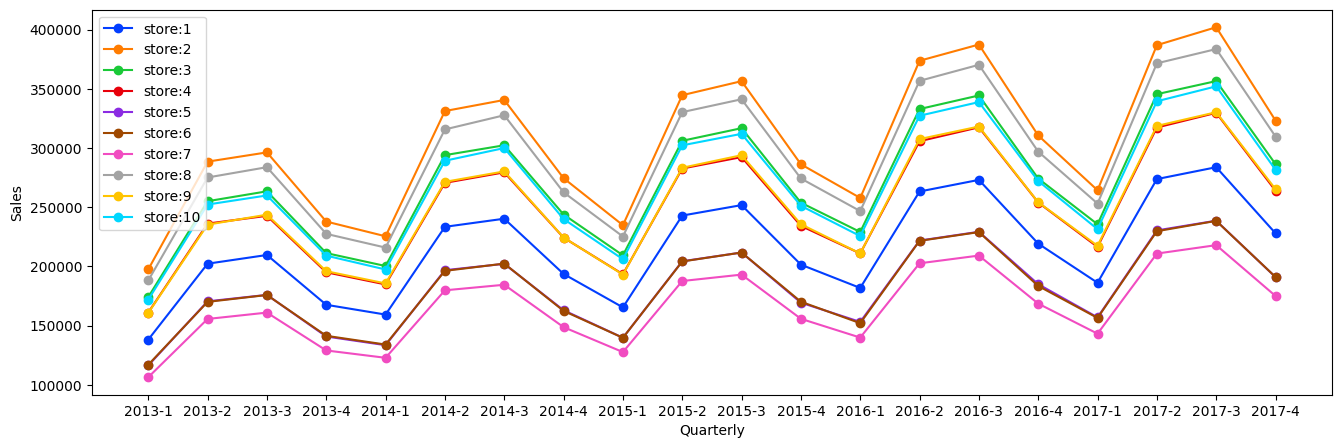

In [165]:
# quarter sales at each store
plt.figure(figsize=(16,5))
sns.set_palette("bright")

df_qs = df_train.groupby([df_train['date'].dt.year,df_train['date'].dt.quarter,df_train['store']]).agg({'sales':'sum'})

for st in df_qs.index.get_level_values(2).unique():
  df = df_qs[df_qs.index.get_level_values(2)==st]
  time = [f'{yr}-{qr}' for yr,qr in zip(df.index.get_level_values(0), df.index.get_level_values(1))]
  sale = np.array(df.sales)
  plt.plot(time,sale, marker='o', label=f'store:{st}',)

plt.xlabel('Quarterly')
plt.ylabel('Sales')
plt.legend()
plt.show()